# Variable Projection for dimension reduction using polynomial basis terms

<h4>By Henry Shaowu Yuchi</h4>

The variable projection method is used for solving separable non-linear least squares problems [1]. The general idea is to minimise the residual of a non-linear fitting. Given a set of observations, the model is a linear combination of non-linear functions that depends on multiple parameters. Here this idea of variable projection is applied to ridge approximation for parameter subspace-based dimension reduction. The algorithm detailed below is build on the ideas in Hokanson and Constantine [2], who formulate a Gauss-Newton approach to solve this problem, by explicity deriving the form of the Jacobian by leveraging a key identity for Fréchet derivatives in [1].

# Theory

For a function with inputs and outputs, variable projection approximates the outputs $y_i$ with polynomials
\begin{align*}
y_i  & = f(\boldsymbol{x}_i) \\
& \approx g(\mathbf{U}^T\boldsymbol{x}_i) \\
& =\sum_j a_j\phi_j(\mathbf{U}^T\boldsymbol{x}_i),
\end{align*}
$\phi_j(\mathbf{U}^T\boldsymbol{x}_i)$ are polynomial basis terms;
$a_j$ are their coefficients.

The residual is then given by
\begin{equation}
r_i(\mathbf{U})=y_i-\sum_j a_j\phi_j(\mathbf{U}^T\boldsymbol{x}_i).
\end{equation}

Re-writing this in matrix form,
\begin{equation}
\mathbf{r(U)}=\mathbf{y}-\mathbf{V(U)}\mathbf{a},
\end{equation}

$r_i(\mathbf{U})$ are entries of $\mathbf{r(U)}$; 
$y_i$ are entries of $\mathbf{y}$; 
$\phi_j(\mathbf{U}^T\boldsymbol{x}_i)$ are entries of Vandermonde matrix $\mathbf{V(U)}$; 
$a_j$ are entries of $\mathbf{a}$.

The Vandermonde matrix contains all polynomial terms $\phi_j$.
\begin{equation}
\mathbf{V(U)}=
\begin{bmatrix}
    \phi_1(\mathbf{U}^T\boldsymbol{x}_1)       & \phi_2(\mathbf{U}^T\boldsymbol{x}_1) & \dots & \phi_j(\mathbf{U}^T\boldsymbol{x}_1)  & \dots \\
    \phi_1(\mathbf{U}^T\boldsymbol{x}_2)       & \phi_2(\mathbf{U}^T\boldsymbol{x}_2) & \dots & \phi_j(\mathbf{U}^T\boldsymbol{x}_2)  & \dots \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
    \phi_1(\mathbf{U}^T\boldsymbol{x}_i)       & \phi_2(\mathbf{U}^T\boldsymbol{x}_i) & \dots & \phi_j(\mathbf{U}^T\boldsymbol{x}_i)  & \dots \\
\vdots & \vdots & \vdots & \vdots & \vdots     
\end{bmatrix}.
\end{equation}

When the degree of polynomial is 2 and subspace dimension is 2,
\begin{equation}
\mathbf{V(U)}=
\begin{bmatrix}
    1       & \mathbf{U}_1^T\boldsymbol{x}_1 & \mathbf{U}_2^T\boldsymbol{x}_1 & (\mathbf{U}_1^T\boldsymbol{x}_1)(\mathbf{U}_2^T\boldsymbol{x}_1)  &  (\mathbf{U}_1^T\boldsymbol{x}_1)^2 & (\mathbf{U}_2^T\boldsymbol{x}_1)^2\\
	1       & \mathbf{U}_1^T\boldsymbol{x}_2 & \mathbf{U}_2^T\boldsymbol{x}_2 & (\mathbf{U}_1^T\boldsymbol{x}_2)(\mathbf{U}_2^T\boldsymbol{x}_2)  &  (\mathbf{U}_1^T\boldsymbol{x}_2)^2 & (\mathbf{U}_2^T\boldsymbol{x}_2)^2\\
\vdots & \vdots & \vdots &   & \vdots & \vdots \\
	1       & \mathbf{U}_1^T\boldsymbol{x}_M & \mathbf{U}_2^T\boldsymbol{x}_M & (\mathbf{U}_1^T\boldsymbol{x}_M)(\mathbf{U}_2^T\boldsymbol{x}_M)  &  (\mathbf{U}_1^T\boldsymbol{x}_M)^2 & (\mathbf{U}_2^T\boldsymbol{x}_2)^M
\end{bmatrix}.
\end{equation}

This is a non-linear least squares problem. We can find its solution:
\begin{equation}
\mathbf{a}=\mathbf{V(U)}^+\mathbf{y},
\end{equation}
then the residual can be reformulated:
\begin{align}
\mathbf{r(U)} &=\mathbf{y}-\mathbf{V(U)}\mathbf{a} =\mathbf{y}-\mathbf{V(U)V(U)^+}\mathbf{y}=(\mathbf{I}-\mathbf{V(U)}\mathbf{V(U)})\mathbf{y}.
\end{align}

Find $\mathbf{U}$ by optimisation,

\begin{equation}
\mathbf{U}=\underset{\mathbf{U}\in\mathbb{G}(n,\mathbb{R}^m)}{\text{argmin}} \| \mathbf{r(U)}    \|_2^2\,=\underset{\mathbf{U}}{\text{argmin}}\| (\mathbf{I}-\mathbf{V(U)}\mathbf{V(U)}^+)\mathbf{y}\|_2^2\,.
\end{equation}

Gauss-Newton algorithm is used for optimisation, as it is a non-linear least squares problem.

The Jacobian tensor is defined as
\begin{equation}
\boldsymbol{\mathcal{J}}_{i,j,k}(\mathbf{U})=\frac{\partial \mathbf{[r(U)]}_i}{\partial [\mathbf{U}]_{j,k}}\, .
\end{equation}
The iterative update expression is
\begin{equation}
\mathbf{U}^{(s+1)}=\mathbf{U}^{(s)}-(\boldsymbol{\mathcal{J}}_{i,j,k}(\mathbf{U}^{(s)}))^+\mathbf{r}(\mathbf{U}^{(s)}),
\end{equation}
where $(\boldsymbol{\mathcal{J}}_{i,j,k}(\mathbf{U}^{(s)}))^+$ is the pseudoinverse of the Jacobian.

# Code Implementation

In turbomachinery design, the fan blade designs are usually parametrised by a few hundred design variables, representing the geometric properties at various positions of the fan blade span. In this notebook, we look at one such fan blade, which contains 25 variables per design, while the corresponding efficiency of each design is evaluated by Computational Fluid Dynamics (CFD) simulations. This case study was previously studied in [3] leveraging ideas from the active subspace literature [4]. 

In [1]:
import numpy as np
import scipy
from scipy.linalg import orth
from equadratures import *

In [2]:
X = np.loadtxt('data/X.dat')
fX = np.loadtxt('data/Y.dat')

This dataset contains 554 pairs of inputs (designs of blades) and outputs (CFD-evaluataed efficiency), obtained form [4]. The dimension of inputs is 25 (25D design space). Using variable projection, we wish to find a surrogate model for this relationship in 2D. All input vectors are put in X.dat, while the outputs are in Y.dat. They are stored as variables X and fX respectively. Now, instead of using all 554 data points, we will only use 150.

In [4]:
X = X[0:150,:]
fX = fX[0:150]
n=2
p=2

$n$ stands for the dimensionality of the active subspace, which is also the dimenion of surrogate model. Here it is set to 2. This indicates the active subspace $\mathbf{U}$ found would be of $25\times 2$. $p$ stands for the degree of polynomial basis terms. $p=2$ suggests the model can capture both linear and quadratic relationships, but not cubic or above.

In [5]:
U,R=variable_projection(X,fX,n,p,gamma=0.1,beta=0.1)

Here gamma is the line search step reduction factor, where beta is the Armijo tolerance for backtracking line search. We set both values at 0.1 here. In the outputs, U is the active subspace found, R is the optimised residual.

In [6]:
print U

[[-1.82080683e-01  1.20438253e-01]
 [ 7.56548566e-03 -4.61879572e-02]
 [-4.51831997e-02  8.13772726e-02]
 [-3.68324223e-04  4.77586095e-02]
 [ 9.22007486e-02 -6.71263751e-02]
 [ 3.19611118e-02 -3.52580528e-03]
 [ 6.34676941e-02  1.60040753e-01]
 [ 1.50199334e-01  3.80593381e-01]
 [ 3.31603009e-01  6.53127786e-01]
 [ 4.76934377e-01  2.56539884e-01]
 [ 7.99680592e-02 -1.33276911e-01]
 [ 4.04797466e-02  2.90375371e-03]
 [ 1.59577805e-01 -2.64464822e-02]
 [ 4.25077270e-01 -2.37057027e-01]
 [ 6.05741086e-01 -3.93838206e-01]
 [-5.39347758e-03 -9.02218713e-03]
 [-4.30125873e-02  5.49480508e-02]
 [-8.13155239e-03  1.26816508e-02]
 [-5.31616595e-02  7.35351569e-02]
 [-7.08090294e-03  5.57288057e-04]
 [-4.45227921e-02  3.04486124e-02]
 [ 3.03820437e-02 -9.21024646e-02]
 [-1.26461638e-03 -7.42634017e-02]
 [ 4.82309279e-02 -2.10283629e-01]
 [-6.63375672e-03 -9.74585072e-02]]


Now the active subspace is found, we can plot the high dimensional data onto the 2D active subspace. Here it is noted that since the approach finds the active subspace $\mathbf{U}$ without a kernel matrix, $\mathbf{U}=[\mathbf{U}_1,\mathbf{U}_2]$.

In [7]:
active1 = np.dot( X , U[:,0] ) 
active2 = np.dot( X , U[:,1] )

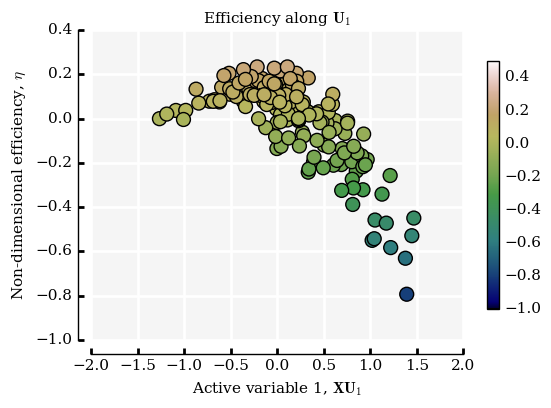

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)
cax = ax.scatter(active1, fX, c=fX, marker='o', s=100, vmin=-1, vmax=0.5)
cbar = plt.colorbar(cax, extend='neither', spacing='proportional', orientation='vertical', shrink=0.8)
ax.set_xlabel('Active variable 1, $\mathbf{XU_{1}}$')
ax.set_ylabel('Non-dimensional efficiency, $\eta$')
plt.xlim([-2.0, 2.0])
adjust_spines(ax, ['left', 'bottom'])
ax.set_title('Efficiency along $\mathbf{U_{1}}$')
plt.show()

//anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


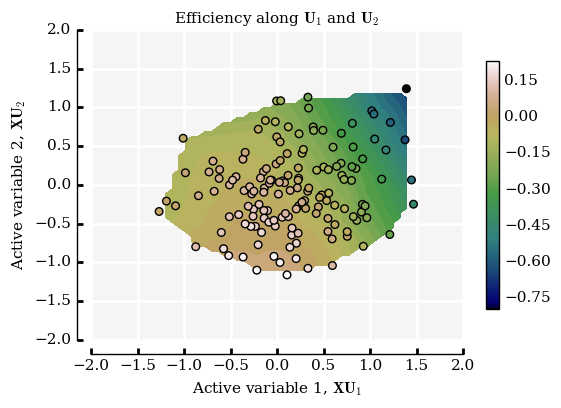

In [9]:
from matplotlib.mlab import griddata
def grid(x, y, z, resX=40, resY=40):
    "Convert 3 column data to matplotlib grid"
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi, interp='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

X, Y, Z = grid(active1, active2, fX)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = plt.contourf(X, Y, Z, 20, vmin=-1, vmax=0.5)
cax = ax.scatter(active1, active2,c=fX, marker='o', s=30)
cbar = plt.colorbar(cax, extend='neither', spacing='proportional', orientation='vertical', shrink=0.8)
ax.set_xlabel('Active variable 1, $\mathbf{XU_{1}}$')
ax.set_ylabel('Active variable 2, $\mathbf{XU_{2}}$')
plt.xlim([-2.0, 2.0])
plt.ylim([-2.0, 2.0])
adjust_spines(ax, ['left', 'bottom'])
ax.set_title('Efficiency along $\mathbf{U_{1}}$ and $\mathbf{U_{2}}$')
plt.show()

# References

[1] Golub, G., and Pereyra, V. "Separable nonlinear least squares: the variable projection method and its applications." Inverse problems 19.2 (2003): R1

[2] Hokanson, J. M., and Constantine, P. G. "Data-driven polynomial ridge approximation using variable projection." SIAM Journal on Scientific Computing 40.3 (2018): A1566-A1589.

[3] Seshadri, P., Shahpar, S., Constantine, P., Parks, G. and Adams, M. "Turbomachinery Active Subspace Performance Maps." Journal of Turbomachinery 140, no. 4 (2018): 041003.

[4] Constantine, P. G. (2015). Active subspaces: Emerging ideas for dimension reduction in parameter studies. SIAM.